# Multiple linear regression


In [1]:
import pandas as pd
df = pd.read_excel("housing_data.xlsx",)

In [10]:
cols = df.columns

colsX = [col for col in cols if col != 'MEDV']

X = df[colsX].values
y = df['MEDV']

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [11]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [14]:
# Standardize data (Not required for simple linear regression, but required for Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression

# Regression
mlr = LinearRegression()
mlr.fit(X_train_std, y_train)

# Prediction
y_train_pred = mlr.predict(X_train_std)
y_test_pred = mlr.predict(X_test_std)


In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [18]:
print(f"R2 Train: {r2_train}")
print(f"R2 Test: {r2_test}")
print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")

R2 Train: 0.7645451026942549
R2 Test: 0.6733825506400195
MSE Train: 19.958219814238046
MSE Test: 27.195965766883205


Text(0.5, 1.0, 'Test')

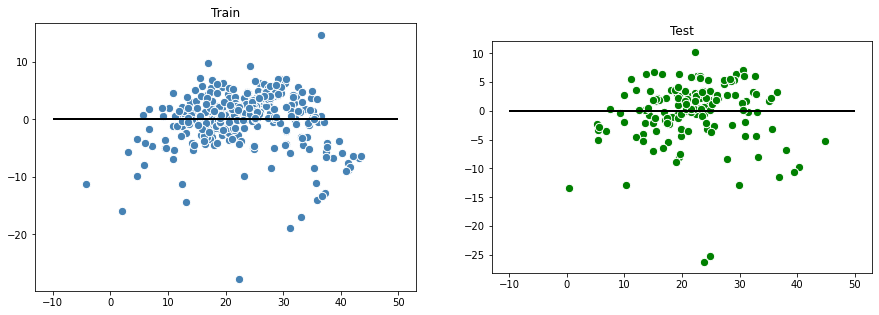

In [38]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
ax1.scatter(y_train_pred, y_train_pred - y_train, c="steelblue", marker="o", edgecolor="white", s=70)
ax1.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax1.axes.set_aspect("equal")
ax1.set_title('Train')

ax2.scatter(y_test_pred, y_test_pred - y_test, c="green", marker="o", edgecolor="white", s=70)
ax2.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
ax2.axes.set_aspect("equal")
ax2.set_title('Test')

